In [34]:
from tarfile import data_filter

import pandas as pd
import numpy as np
import importlib
from datetime import datetime
import matplotlib.pyplot as plt
from dask.dataframe import read_csv
from matplotlib.pyplot import xticks
from pandas.core.interchange.dataframe_protocol import DataFrame
from ply.cpp import xrange
from pygments.lexer import bygroups

import volpy_func_lib as vp
import load_clean_lib
import table_lib
import vol_strat_lib as vs

from datetime import datetime
from volpy_func_lib import load_forward_price

In [35]:
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)

<module 'table_lib' from 'D:\\Professionelt\\Code\\volpy\\table_lib.py'>

In [36]:
om_folder = "SPX_full" #SPX_full, i2s1_full_v2'
sum_df = vs.import_sum(om_folder = om_folder)
sum_df["SW_day_scaled"] = sum_df["SW_day"] 

factor_df = pd.read_csv("data/factor_df.csv")
factor_df['date'] = pd.to_datetime(factor_df['date'], format='%Y-%m-%d')

In [37]:
factor_df = factor_df[factor_df["date"] <= pd.to_datetime("2025-02-28")]

In [40]:
factor_df_columns = ['Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'BAB', 'QMJ', 'RF']
summary_df_column = ['ticker','SW_month', 'SW_day', 'SW_day_scaled']
common_columns = ['date']

keep_columns = factor_df_columns + summary_df_column + common_columns 
return_df = sum_df[summary_df_column + common_columns].merge(factor_df, on='date', how='left')[keep_columns]

In [41]:
SPX_return = return_df[return_df['ticker'] == 'SPX']

In [42]:
SPX_return["SW_day_scaled"] = SPX_return["SW_day"] * SPX_return["SW_day"].mean() / SPX_return["Mkt"].mean()

In [43]:
def lm_regress(df, y_column, x_columns, print_summary = True):
    df = df[df[y_column].isna() == False]
    import statsmodels.api as sm
        
    # Define your target variable and factor variables
    X = df[x_columns]  # Independent variables
    y = df[y_column]   # Dependent variable
    
    # Add a constant term to the independent variables for the intercept
    X = sm.add_constant(X)
    
    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    if print_summary:
        # Print the summary statistics
        print(model.summary())

    return model.summary()

In [44]:
target_column = 'SW_day_scaled'
feature_columns = ['Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'BAB', 'QMJ']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:          SW_day_scaled   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     698.0
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:18:54   Log-Likelihood:                 8243.6
No. Observations:                6962   AIC:                        -1.647e+04
Df Residuals:                    6953   BIC:                        -1.641e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0132      0.001     14.790      0.0

In [45]:
target_column = 'SW_day_scaled'
feature_columns = ['Mkt', 'SMB', 'HML']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:          SW_day_scaled   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     1758.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:18:59   Log-Likelihood:                 8155.2
No. Observations:                6962   AIC:                        -1.630e+04
Df Residuals:                    6958   BIC:                        -1.628e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0139      0.001     15.506      0.0

In [46]:
target_column = 'SW_day_scaled'
feature_columns = ['Mkt']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:          SW_day_scaled   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     5105.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:19:06   Log-Likelihood:                 8106.5
No. Observations:                6962   AIC:                        -1.621e+04
Df Residuals:                    6960   BIC:                        -1.620e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0140      0.001     15.405      0.0

In [18]:
target_column = 'SW_day'
feature_columns = ['Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'BAB', 'QMJ']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:                 SW_day   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     698.0
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:07:01   Log-Likelihood:                 21471.
No. Observations:                6962   AIC:                        -4.292e+04
Df Residuals:                    6953   BIC:                        -4.286e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.000    -14.790      0.0

In [136]:
target_column = 'SW_day'
feature_columns = ['Mkt', 'RMW']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:                 SW_day   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     1381.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:01:07   Log-Likelihood:                 17778.
No. Observations:                6962   AIC:                        -3.555e+04
Df Residuals:                    6959   BIC:                        -3.553e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.000     -5.356      0.0

In [138]:
target_column = 'SW_day'
feature_columns = ['Mkt']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:                 SW_day   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     2656.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:01:22   Log-Likelihood:                 17740.
No. Observations:                6962   AIC:                        -3.548e+04
Df Residuals:                    6960   BIC:                        -3.546e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.000     -5.761      0.0

In [139]:
target_column = 'SW_day'
feature_columns = ['Mkt', 'HML', 'SMB']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:                 SW_day   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     916.0
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:01:23   Log-Likelihood:                 17773.
No. Observations:                6962   AIC:                        -3.554e+04
Df Residuals:                    6958   BIC:                        -3.551e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.000     -5.773      0.0

In [140]:
target_column = 'SW_month'
feature_columns = ['Mkt']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:               SW_month   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06427
Date:                Tue, 18 Mar 2025   Prob (F-statistic):              0.800
Time:                        11:01:23   Log-Likelihood:                 10314.
No. Observations:                6933   AIC:                        -2.062e+04
Df Residuals:                    6931   BIC:                        -2.061e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0108      0.001    -16.394      0.0

In [141]:
target_column = 'SW_month'
feature_columns = ['Mkt', 'HML', 'SMB']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:               SW_month   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.352
Date:                Tue, 18 Mar 2025   Prob (F-statistic):             0.0702
Time:                        11:01:23   Log-Likelihood:                 10318.
No. Observations:                6933   AIC:                        -2.063e+04
Df Residuals:                    6929   BIC:                        -2.060e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0108      0.001    -16.375      0.0

In [142]:
target_column = 'SW_month'
feature_columns = ['Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'BAB', 'QMJ']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:               SW_month   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.784
Date:                Tue, 18 Mar 2025   Prob (F-statistic):             0.0752
Time:                        11:01:23   Log-Likelihood:                 10322.
No. Observations:                6933   AIC:                        -2.063e+04
Df Residuals:                    6924   BIC:                        -2.056e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0108      0.001    -16.438      0.0

In [143]:
target_column = 'SW_month'
feature_columns = ['Mkt']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:               SW_month   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06427
Date:                Tue, 18 Mar 2025   Prob (F-statistic):              0.800
Time:                        11:01:23   Log-Likelihood:                 10314.
No. Observations:                6933   AIC:                        -2.062e+04
Df Residuals:                    6931   BIC:                        -2.061e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0108      0.001    -16.394      0.0

In [144]:
target_column = 'SW_month_nolag'
feature_columns = ['Mkt']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:         SW_month_nolag   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2232
Date:                Tue, 18 Mar 2025   Prob (F-statistic):              0.637
Time:                        11:01:24   Log-Likelihood:                 10374.
No. Observations:                6963   AIC:                        -2.074e+04
Df Residuals:                    6961   BIC:                        -2.073e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0108      0.001    -16.461      0.0

In [145]:
target_column = 'SW_month_ln_ret'
feature_columns = ['Mkt']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:        SW_month_ln_ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5221
Date:                Tue, 18 Mar 2025   Prob (F-statistic):              0.470
Time:                        11:01:24   Log-Likelihood:                -6800.8
No. Observations:                6933   AIC:                         1.361e+04
Df Residuals:                    6931   BIC:                         1.362e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5095      0.008    -65.701      0.0

In [146]:
target_column = 'SW_day_ln_ret'
feature_columns = ['Mkt']

_ = lm_regress(SPX_return, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:          SW_day_ln_ret   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1321.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          6.61e-265
Time:                        11:01:24   Log-Likelihood:                -376.30
No. Observations:                6962   AIC:                             756.6
Df Residuals:                    6960   BIC:                             770.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0308      0.003    -10.069      0.0

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        5.000e+00, 3.000e+00, 1.000e+01, 1.200e+01, 1.700e+01, 2.900e+01,
        3.500e+01, 4.300e+01, 4.200e+01, 4.400e+01, 5.100e+01, 5.500e+01,
        7.300e+01, 9.800e+01, 2.390e+02, 5.360e+02, 1.024e+03, 1.523e+03,
        1.270e+03, 6.870e+02, 3.600e+02, 1.890e+02, 1.160e+02, 7.400e+01,
        1.040e+02, 8.300e+01, 5.700e+01, 4.800e+01, 4.200e+01, 2.000e+01,
        1.800e+01, 1.500e+01, 1.000e+01, 7.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00]),
 array([-1.75444866, -1.68243626, -1.61042386, -1.53841145, -1.46639905,
        -1.39438665, -1.32237425, -1.25036185, -1.17834944, -1.10633704,
        -1.03432464, -0.96231224, -0.89029984, -0.81828743, -0.74627503,
        -0.67426263, -0.60225023, -0.53023783, -0.45822543, -0.38621302,
        -0.31420062, -0.24218822, -0.17017582, -0.09816342, -0.02615101,
         0.

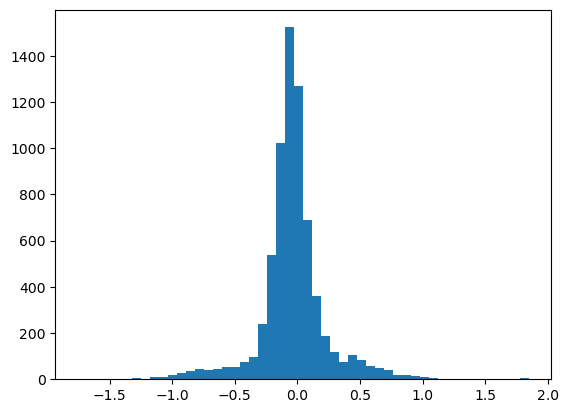

In [147]:
plt.hist(SPX_return['SW_day_ln_ret'], bins=50)

(array([  1.,   4.,  13.,  23.,  47.,  71., 118., 169., 245., 266., 416.,
        534., 589., 694., 651., 679., 508., 442., 360., 260., 183., 172.,
        128.,  82.,  62.,  33.,  31.,  28.,  21.,  22.,  18.,  16.,  13.,
         12.,   5.,   2.,   3.,   1.,   2.,   2.,   0.,   2.,   1.,   0.,
          1.,   0.,   1.,   0.,   0.,   2.]),
 array([-2.44323809, -2.31255054, -2.18186298, -2.05117543, -1.92048788,
        -1.78980032, -1.65911277, -1.52842522, -1.39773766, -1.26705011,
        -1.13636256, -1.005675  , -0.87498745, -0.7442999 , -0.61361234,
        -0.48292479, -0.35223724, -0.22154968, -0.09086213,  0.03982542,
         0.17051298,  0.30120053,  0.43188808,  0.56257564,  0.69326319,
         0.82395074,  0.9546383 ,  1.08532585,  1.2160134 ,  1.34670096,
         1.47738851,  1.60807606,  1.73876362,  1.86945117,  2.00013872,
         2.13082628,  2.26151383,  2.39220138,  2.52288894,  2.65357649,
         2.78426404,  2.9149516 ,  3.04563915,  3.1763267 ,  3.30701426,
 

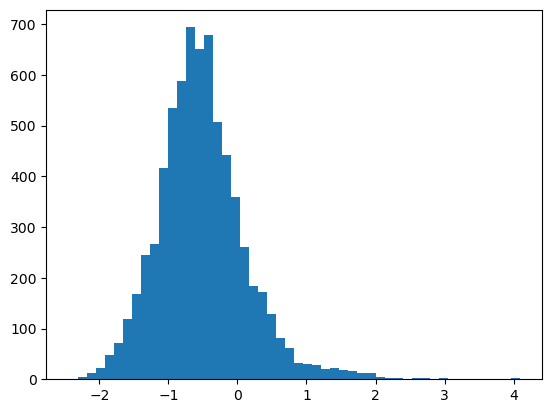

In [148]:
plt.hist(SPX_return['SW_month_ln_ret'], bins=50)

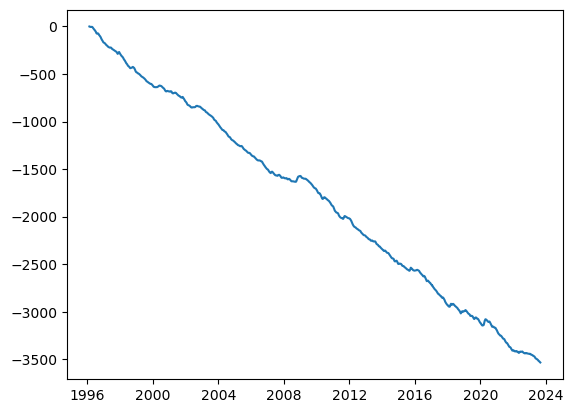

In [160]:
plt.plot(SPX_return['date'], np.cumsum(SPX_return['SW_month_ln_ret']))

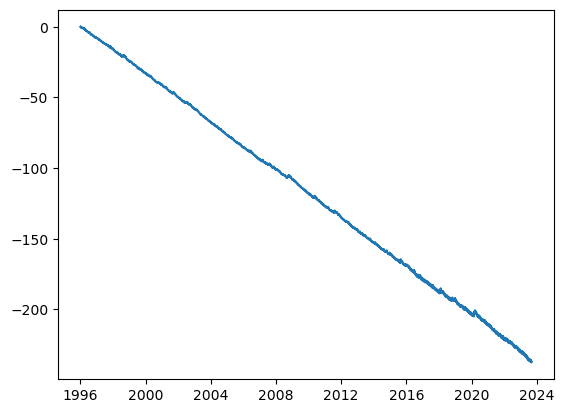

In [153]:
plt.plot(SPX_return['date'], np.cumsum(SPX_return['SW_day_ln_ret']))

In [151]:
SPX_return['SW_day_ln_ret']

6963          NaN
6964    -0.090963
6965    -0.093584
6966     0.429048
6967    -0.044639
           ...   
13921   -0.190134
13922   -0.198972
13923   -0.075184
13924   -0.726102
13925    0.420835
Name: SW_day_ln_ret, Length: 6963, dtype: float64

In [ ]:
'SW_month', 'SW_day', 'SW_month_nolag', 'SW_month_ln_ret', 'SW_day_ln_ret'